In [14]:
import numpy as np
import matplotlib.pyplot as plt
from nanonets import Simulation 
from nanonets.utils import logic_gate_sample, display_network

In [9]:
# ─── Configuration ───
N_MIN, N_MAX    = 3, 16
N_E             = 8
V_CONTROL       = 0.1
V_INPUT         = 0.01
V_GATE          = 0.0
N_DATA          = 20000
N_PROCS         = 10
T_VAL           = 5
INPUT_POS       = [1,3]
N_REF_NET       = 9
E_POS_REF       = 1

def get_transfer_coeff(n):
    topo = {"Nx": n, "Ny": n,
            "e_pos" : [[0,0], [int((n-1)/2),0], [n-1,0], [0,int((n-1)/2)],
                       [0,n-1], [n-1,int((n)/2)], [int((n)/2),(n-1)], [n-1,n-1]],
            "electrode_type" : ['constant']*8}
    sim_class = Simulation(topology_parameter=topo, pack_optimizer=False)
    sim_class.build_conductance_matrix()
    sim_class.init_transfer_coeffs()
    return sim_class.get_transfer_coeffs()

def get_scaling_factor(n=9, e_pos=1):
    transf_coeff    = np.array([get_transfer_coeff(nn) for nn in range(N_MIN, N_MAX + 1)])
    factor          = np.ones_like(transf_coeff, dtype=float)
    np.divide(transf_coeff[n-N_MIN,e_pos], transf_coeff, out=factor, where=transf_coeff!=0)
    return factor

def get_voltage_sample():
    scale = get_scaling_factor(N_REF_NET, E_POS_REF)
    volts = []
    for i, n in enumerate(range(N_MIN, N_MAX + 1)):
        topo = {"Nx": n, "Ny": n,
                "e_pos" : [[0,0], [int((n-1)/2),0], [n-1,0], [0,int((n-1)/2)],
                           [0,n-1], [n-1,int((n)/2)], [int((n)/2),(n-1)], [n-1,n-1]],
                "electrode_type" : ['constant']*N_E}
        volt = logic_gate_sample(V_CONTROL, INPUT_POS, N_DATA, topo, V_INPUT,
                                 V_GATE, sample_technique='uniform')
        volt *= np.hstack((scale[i,:],0.0))
        volts.append(volt)
    return volts

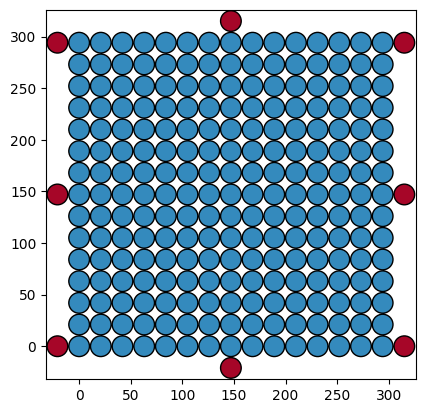

In [31]:
n    = 15
topo = {"Nx": n, "Ny": n,
            "e_pos" : [[0,0], [int((n-1)/2),0], [n-1,0], [0,int((n-1)/2)],
                       [0,n-1], [n-1,int((n)/2)], [int((n)/2),(n-1)], [n-1,n-1]],
            "electrode_type" : ['constant']*8}
sim_class = Simulation(topology_parameter=topo, pack_optimizer=False)

fig, ax = plt.subplots()
fig,ax  = display_network(sim_class.G, sim_class.pos, sim_class.radius_vals, sim_class.net_topology, fig=fig, ax=ax)